# E2 - Exercises on Numpy and Matplotlib


## Your first stochastic process

1. Generate an array of 20 elements that can be randomly $+1$ or $-1$. Write this in a function that takes as argument the number of points to generate (it will be useful later).

In [2]:
import numpy as np

def binary_rand_sequence(size):
  return np.random.randint(-1,1,size) * 2 + 1

a = binary_rand_sequence(20)
print (a)

[-1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1  1]


In [3]:
print(np.random.randint(-1,1,10))
print(np.random.randint(-1,1,10) * 2)
print(np.random.randint(-1,1,10) * 2 + 1)

[-1  0 -1  0  0  0 -1 -1  0 -1]
[-2  0 -2  0  0 -2  0  0 -2  0]
[ 1 -1 -1 -1 -1 -1 -1 -1  1 -1]


2. Count the number of $1$s in your array. Do this in three ways. Write all the three methods as functions that take the array as argument and return the count.

> 2a. A fast way is to use the method `unique`, try to understand how this method works from the official documentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html

In [4]:
def count_1_unique(array):
  unique_elements, counts = np.unique(array, return_counts=True)
  return counts[1]

print (count_1_unique(a))

9


> 2b. Use a standard `for` loop to iterate over the elements and count the ones.

In [5]:
from collections import Counter

def count_1_for(array):
  count=0
  for elem in array:
    if elem == 1:
      count+=1
  return count
  
print(count_1_for(a))

9


> 2c. Use a boolean array to select the elements and use the method `.sum()` to count the true elements.


In [8]:
def count_1_mask_sum(array):
  return (array == 1).sum()

my_int = count_1_mask_sum(a)
print (my_int)

9


In [7]:
print( a == 1 )
print( np.sum(a == 1) )

[False  True False False False False False False  True False False  True
  True  True  True False  True False  True  True]
9


In [10]:
def count_1_mask_len(array):
  return len(array[(array == 1)])

print (count_1_mask_len(a))

9


In [15]:
mask = a == 1
print( len(a[mask]) )

9


3. Which is the fastest way for an array containing 10^6 elements? Use the function written in 1 to generate the array.

> **Hint**: use the module time as in the final part of the numpy tutorial, and print how much time each of the three methods take.

In [12]:
from time import time

big_a = binary_rand_sequence(10**6)

t0 = time()
result = count_1_unique(big_a)
t1 = time()-t0
print("Result with unique", result, " obtained in ", t1)

t0 = time()
result = count_1_for(big_a)
t1 = time()-t0
print("Result with for loop", result, " obtained in ", t1)

t0 = time()
result = count_1_mask_sum(big_a)
t1 = time()-t0
print("Result with the sum of the boolean mask", result, " obtained in ", t1)

t0 = time()
result = count_1_mask_len(big_a)
t1 = time()-t0
print("Result with len of the boolean mask", result, " obtained in ", t1)

Result with unique 500044  obtained in  0.03079986572265625
Result with for loop 500044  obtained in  0.3180580139160156
Result with the sum of the boolean mask 500044  obtained in  0.0023860931396484375
Result with len of the boolean mask 500044  obtained in  0.009468555450439453


4. Test the "law of large numbers": compute the fraction of ones, $f$, as the number of the list elements $n$ increases. This generates a **stochastic trajectory** $f(n)$ that should converge to the probability that the event $+1$ is generated: $f(n) \rightarrow 0.5$ as $n \rightarrow \infty$. 

> First, write a function that takes as argument the maximum number of generated elements, $n_{max}$, and returns the array containing all the fraction of ones at each partial size: $(f(1), f(2), \ldots, f(n_{max}))$.

In [ ]:
def fract_trajectory(n_max):
  a = binary_rand_sequence(n_max)
  counts = [0]
  for elem in a:
    counts.append(counts[-1])
    if elem == 1:
      counts[-1] += 1
    
  return counts[1:] / np.arange(1,n_max+1)

frac = fract_trajectory(2000)
size = np.arange(1,len(frac)+1)

> Then plot the fraction of ones, $f$, as a function of the size, $n$. Does it approach $0.5$ for large $n$? Also plot a horizontal dashed line corresponding to $y = 0.5$.

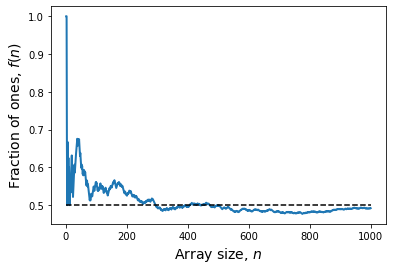

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel(r'Array size, $n$', fontsize=14)
plt.ylabel(r'Fraction of ones, $f(n)$', fontsize=14)
plt.plot(size, frac, lw=2)
plt.plot(size, 0.5*np.ones(len(size)), c='black', ls='--')

> Finally, generate $R=20$ of those trajectories, building a small **ensemble** of your stochastic process. Plot all your trajectories in the same plot. Each realization is different from the other, however there are **statistical regularities** that you can immediately see: 

>> a. All your trajectories tend to stay around 0.5. This can be expected since the probability of getting $1$ is $0.5$. In some cases I can obtain several $+1$ in a row, leading to a trajectory that stays above $y=0.5$, in some other cases it can be that I obtain a lot of $-1$, and the trajectory will stay below the line.

>> b. The trajectories are more dispersed for small sizes and tend to converge around $0.5$ for large $n$.



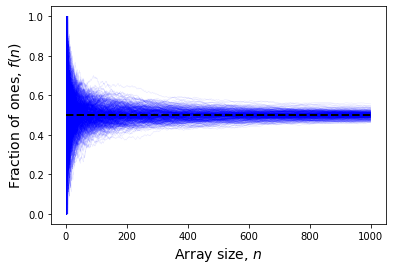

In [ ]:
n_max = 1000
size = np.arange(1,n_max+1)

plt.xlabel(r'Array size, $n$', fontsize=14)
plt.ylabel(r'Fraction of ones, $f(n)$', fontsize=14)
for i in range(500):
  frac = fract_trajectory(n_max)
  plt.plot(size, frac, c='blue', lw=0.5, alpha=0.1)
  
plt.plot(size, 0.5*np.ones(len(size)), c='black', ls='--', lw=2)

Now our aim is to make the two statements above more quantitative. It is important to understand that we are dealing with a random process, and the physical law that describes our variable $f$ cannot be predicted deterministically. However, looking at the "population" of different independent realizations of the process (our statistical ensemble) we can describe the behavior of $f(n)$ in a statistical sense.

5 - We need a function that generates an ensemble of $R$ different sequences of size $n$, and computes the fraction of ones in each sequence.
The function takes as arguments $R$ and $n$ and returns an array containing the fractions of ones for each  realization $(f_1(n), f_2(n), \ldots, f_R(n))$. Use the best counter of ones in point 3 to improve the performance.

In [ ]:
def fract_1_ensemble(n, R):
  fract = []
  for k in range(R):
    fract.append(count_1_mask_sum(binary_rand_sequence(n)) / n)
  return np.array(fract)

> The outcome of the function can be imagined as a slice of the final plot of point 4, where we cut the trajectories at a given $n$, and what we have is an ensemble of $f(n)$s.
Plot the histogram of the fraction of ones of $R=10000$ sequences of size $n=100$. Do you see that most of the values stay around $0.5$?

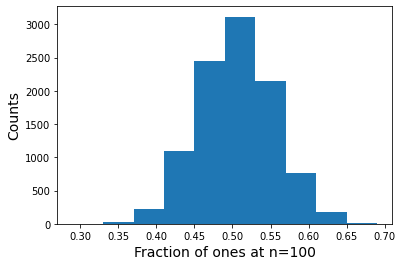

In [ ]:
n = 100
f_list = fract_1_ensemble(n, 10000)

plt.xlabel("Fraction of ones at n={}".format(n), fontsize=14)
plt.ylabel("Counts", fontsize=14)
res = plt.hist(f_list)

> The mathematical object that describes the behavior of our ensemble of outcomes $f(n)$ is the **probability distribution** of this "stochastic variable". You will see the right definition of probability distribution later in your courses, however this is basically equivalent to the histogram above with $R \rightarrow \infty$, and normalized in such a way that the area under the curve is $1$.
If you plot again the histogram as above, and add the property `density=True` within the `hist` function, you will get a normalized histogram, which is a good approximation of the actual probability distribution of $f(n)$. 

> Compute also the average and the standard deviation of the list of the stochastic variables. The first corresponds to the typical value that you expect in your ensemble (the center of your distribution if it's symmetric) and the second one how much the values are dispersed around the average (the width of your distribution).

Average: 0.5004080000000001
Standard deviation: 0.04947376613923788


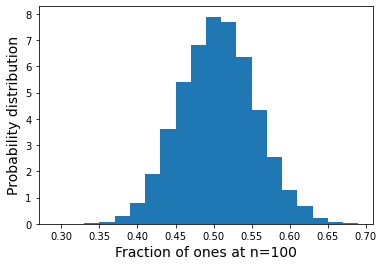

In [ ]:
plt.xlabel("Fraction of ones at n={}".format(n), fontsize=14)
plt.ylabel("Probability distribution", fontsize=14)
res = plt.hist(f_list, bins=20, density=True)
print ("Average:", np.mean(f_list))
print ("Standard deviation:", np.std(f_list))

The next step is to describe how this two numbers, the average and the standard deviation, vary as a function of $n$ (the histograms are at fixed $n$!).
These two object give us a statistical description of our stochastic dynamics.

6 - Now fix the number of sequences to $R=200$, and compute the average and standard deviation of the fraction of ones for different values of $n$. It is not necessary to consider all the values of $n$, but, for example, you can compute these quatities at steps of $10$.

In [ ]:
n_list = np.linspace(1, 1000, 100, dtype=int)
std_list, av_list = np.array([]), np.array([])
for n in n_list:
  ensemble = fract_1_ensemble(n, 500)
  av_list = np.append(av_list, np.mean(ensemble))
  std_list = np.append(std_list, np.std(ensemble))

> Draw the average and the standard deviation  as a function of the size $n$ in two different plots as two subplots of the same figure. Test that:
>> - The average is, more or less, well approximated by the straight horizontal line $y=0.5$, saying that the typical number of ones that I expect to find in a sequence is always the same, independently of the sequence size.
>> - The variance approaches zero as $n \rightarrow \infty$. Later in your studies you will learn that it is also possible to analytically compute the dependency of the standard deviation on $n$, which is:
\begin{equation} \text{std}[f(n)] = \frac{n^{-1/2}}{2} \end{equation}
>> Plot this theoretical curve on the top of your simulation to see that they are almost identical.



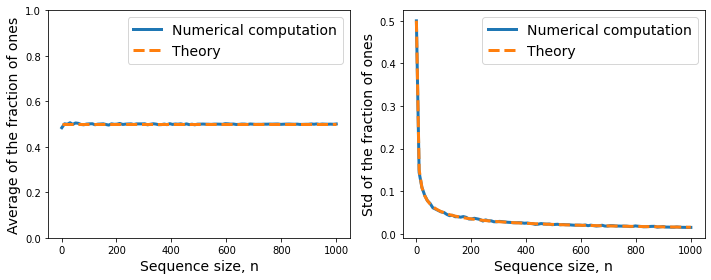

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.ylim([0,1])
plt.xlabel("Sequence size, n", fontsize=14)
plt.ylabel("Average of the fraction of ones", fontsize=14)
plt.plot(n_list, av_list, lw=3, label='Numerical computation')
plt.plot(n_list, 0.5*np.ones(len(n_list)), ls='--', lw=3, label='Theory')
plt.legend(fontsize=14)

plt.subplot(122)
plt.xlabel("Sequence size, n", fontsize=14)
plt.ylabel("Std of the fraction of ones", fontsize=14)
plt.plot(n_list, std_list, lw=3, label='Numerical computation')
plt.plot(n_list, 0.5*n_list**(-0.5), ls='--', lw=3, label='Theory')
plt.legend(fontsize=14)

plt.tight_layout()

7. Draw a nice plot contaning all the information that you got from this exercises. In particular:
> * Draw an ensemble of trajectories as in the point 4.
> * On the top of them draw also the average that you computed above, and the two curves $\pm std + average$. Since the standard deviation gives the width of the distribution, you can expect that most of the trajectories will fall within these two curves.

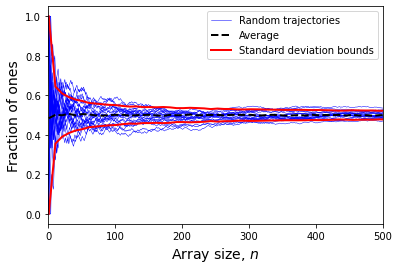

In [ ]:
plt.xlabel('Array size, $n$', fontsize=14)
plt.ylabel('Fraction of ones', fontsize=14)
n_max = 500
plt.xlim([0,n_max])
size = np.arange(1,n_max+1)
frac = fract_trajectory(n_max)
plt.plot(size, frac, lw=0.5, c='blue', label='Random trajectories')
for i in range(20):
  frac = fract_trajectory(n_max)
  plt.plot(size, frac, lw=0.5, c='blue')
  
plt.plot(n_list, av_list, c='black', ls='--', lw=2, label='Average')
plt.plot(n_list, std_list+0.5, lw=2, c='r', label='Standard deviation bounds')
plt.plot(n_list, -std_list+0.5, lw=2, c='r')
plt.legend()

plt.savefig('E2_trajecotries.png', dpi=200)

> Another way to see the concentration of the trajectories as $n$ increases is to plot the probability distributions at different $n$s. Try, for example, to draw three distributions (as the one in point 5) at $n = 20, 100, 1000$, and a lot of realizations $R=10000$.
To see the distributions one above the others make them transparent using the property `alpha=[a number between 0 and 1]` in the `hist` function.

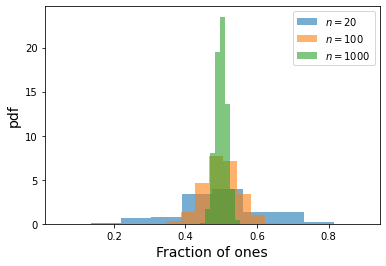

In [ ]:
n_list = [20,100,1000]

plt.xlabel("Fraction of ones", fontsize=14)
plt.ylabel("pdf", fontsize=14)

for n in n_list:
  f_list = fract_1_ensemble(n, 10000)
  res = plt.hist(f_list, density=True, label='$n=%i$' %n, alpha=0.6)
  
plt.legend()
plt.savefig('E2_pdf.png', dpi=200)